# SC1015 DSAI Mini Project

## Part 2: Data Exploration
---------------------------
Through data exploration, we can identify any patterns or trends in the data that can help us answer why the fertility rate is decreasing through the years. By conducting statistical analyses and visualizations, we can identify relationships between variables and explore how women's education and the cost of living impact the fertility rate in Singapore.

In [43]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
%matplotlib inline

In [44]:
FerFactor = pd.read_pickle('FerFactor.pickle')
EduFactor = pd.read_pickle('EduFactor.pickle')
CoLFactor = pd.read_pickle('CoLFactor.pickle')
MarFactor = pd.read_pickle('MarFactor.pickle')

### Multi-Var Plots

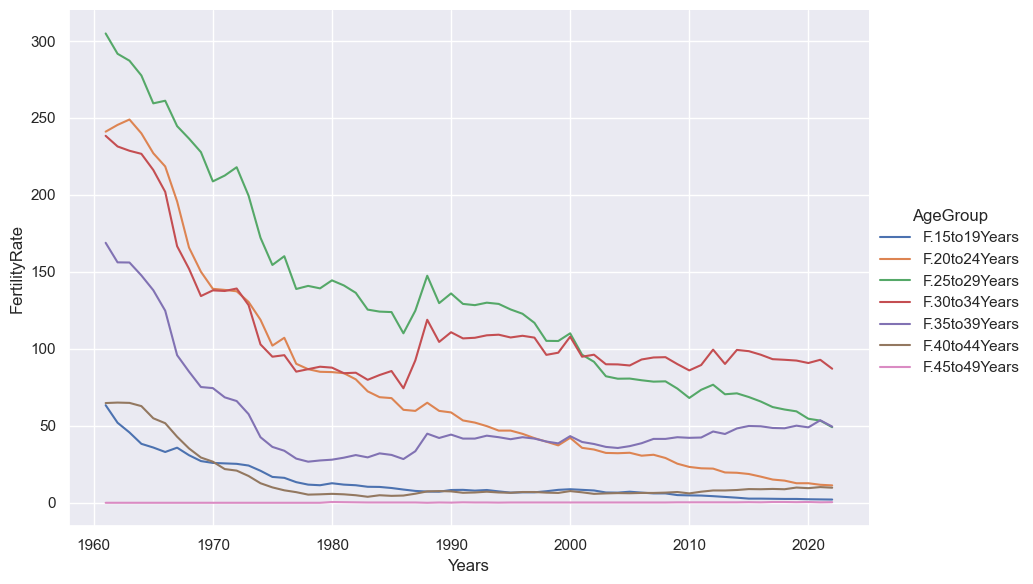

In [45]:
FerFactor_merge = FerFactor.reset_index()
FerFactor_merge = FerFactor_merge.drop(columns=['TotalFertilityRate'])

FerFactor_merge = pd.melt(FerFactor_merge, id_vars=['Years'], var_name='AgeGroup', value_name='FertilityRate')

sb.relplot(data=FerFactor_merge, x="Years", y="FertilityRate", hue="AgeGroup", kind="line", height=6, aspect=1.5)

print("")

### We can see a general down trend till the 1980. Lets zoom in to see the graph from 1980 to 2022.

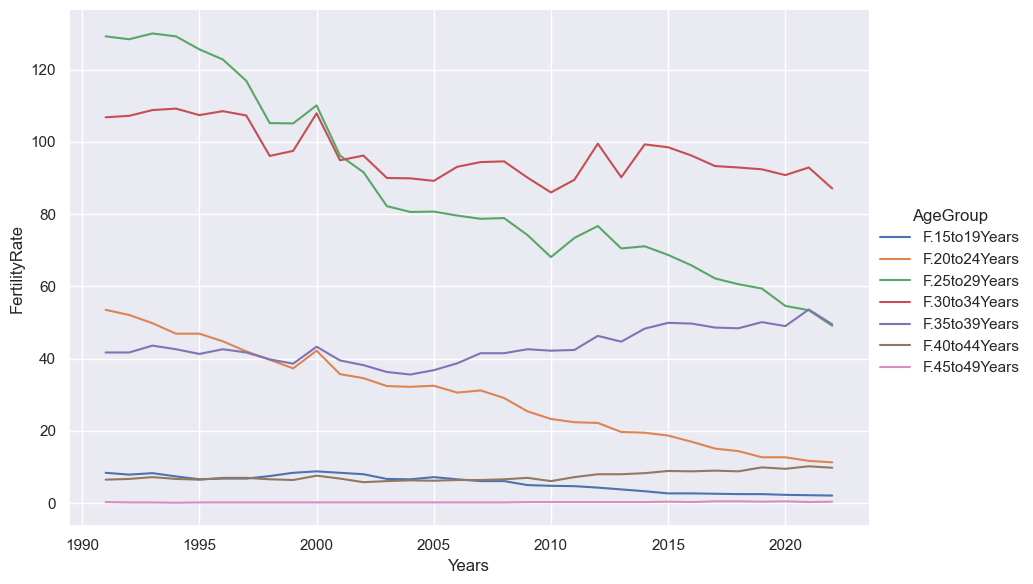

In [46]:
FerFactor_merge2 = FerFactor_merge[FerFactor_merge['Years'] > 1990]
FerFactor_merge2

sb.relplot(data=FerFactor_merge2, x="Years", y="FertilityRate", hue="AgeGroup", kind="line", height=6, aspect=1.5)
print("")

### From the graph, we can spot some unusual trend from the pattern </br> - There is a fertility spike at year 2000 and 2013 </br> - From 1980s onwards, female of age >30 maintain or have slight increase in fertility rate </br> while female of age <30 continue with the decreasing trend

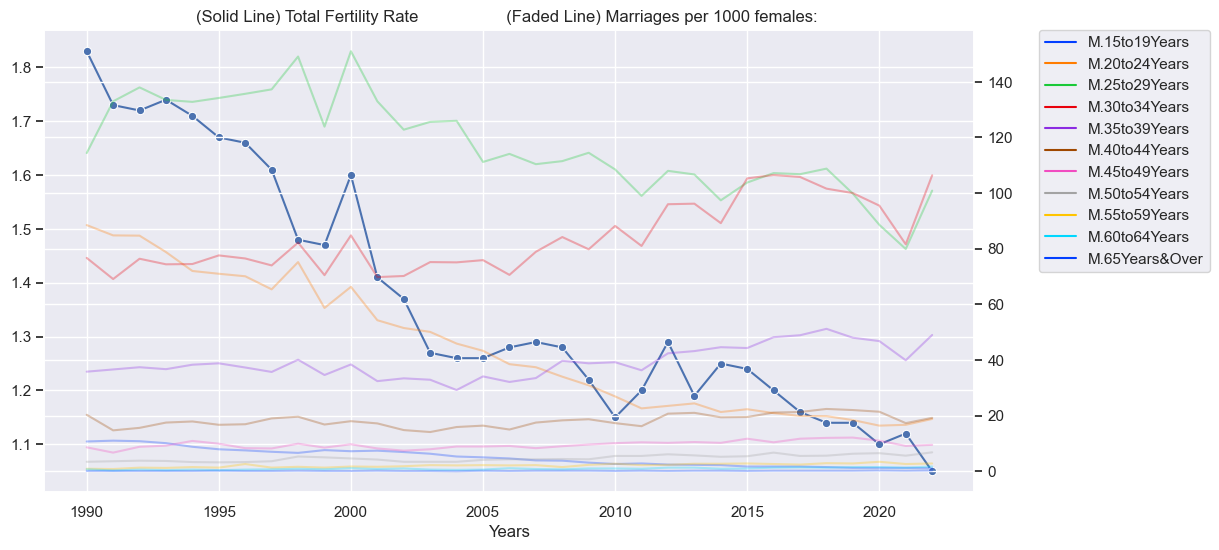

In [47]:
MarFactor_merge = MarFactor.reset_index()
MarFactor_merge = MarFactor_merge.iloc[:33,:]
MarFactor_merge = MarFactor_merge.drop(columns=['TotalFertilityRate'])
MarFactor_merge = MarFactor_merge.drop(columns=['FemaleGeneralMarriageRate'])

MarFactor_merge = pd.melt(MarFactor_merge, id_vars=['Years'], var_name='AgeGroup', value_name='Marriages per 1000 females')

fig, ax1 = plt.subplots(figsize=(12,6))
sb.lineplot(data = EduFactor['TotalFertilityRate'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sb.lineplot(data=MarFactor_merge, x="Years", y="Marriages per 1000 females", palette="bright", alpha=0.3, hue="AgeGroup", ax=ax2)

ax1.set_ylabel("")
ax2.set_ylabel("")
plt.title("(Solid Line) Total Fertility Rate                   (Faded Line) Marriages per 1000 females: ")
ax2.legend(bbox_to_anchor=(1.02, 1.1), loc='upper left', borderaxespad=3)
print("")

### We can see females are getting married later. Females of age >30 are trending upwards, while <30 are trending downwards.

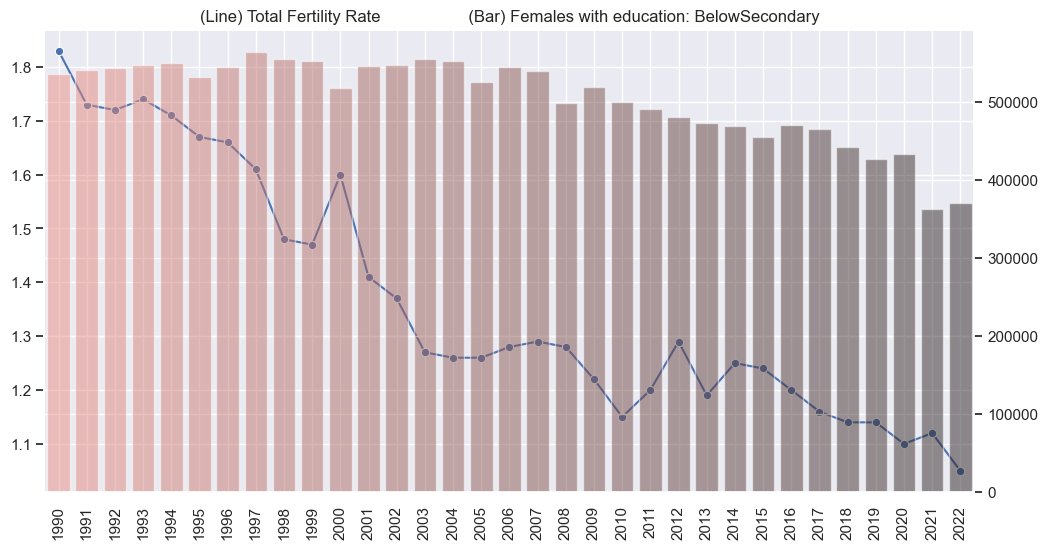

In [48]:
EduFactor_new = EduFactor
EduFactor_new = EduFactor_new.reset_index()
EduFactor_new = EduFactor_new.iloc[::-1].reset_index(drop=True)

def drawGraph(myCol):
    fig, ax1 = plt.subplots(figsize=(12,6))

    sb.lineplot(data = EduFactor_new['TotalFertilityRate'], marker='o', sort = False, ax=ax1)
    ax2 = ax1.twinx()
    sb.barplot(data = EduFactor_new, x='Years', y=myCol, palette="dark:salmon_r", alpha=0.5, ax=ax2)


    ax1.set_ylabel("")
    ax2.set_ylabel("")
    ax1.set_xticklabels(EduFactor_new['Years'], rotation=90)
    plt.title("(Line) Total Fertility Rate                   (Bar) Females with education: " + myCol)
    print("")
    
drawGraph("BelowSecondary")

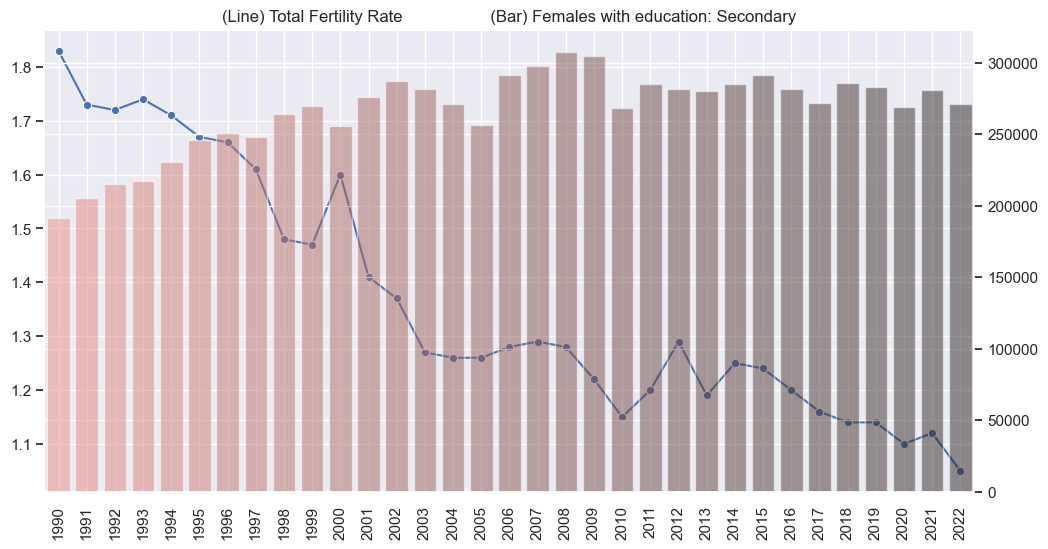

In [49]:
drawGraph("Secondary")

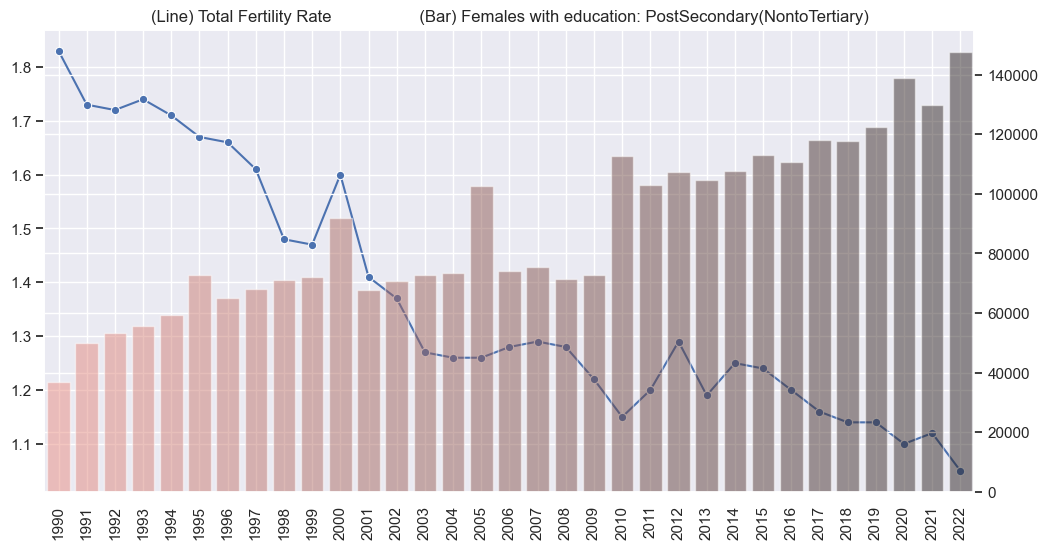

In [50]:
drawGraph("PostSecondary(NontoTertiary)")

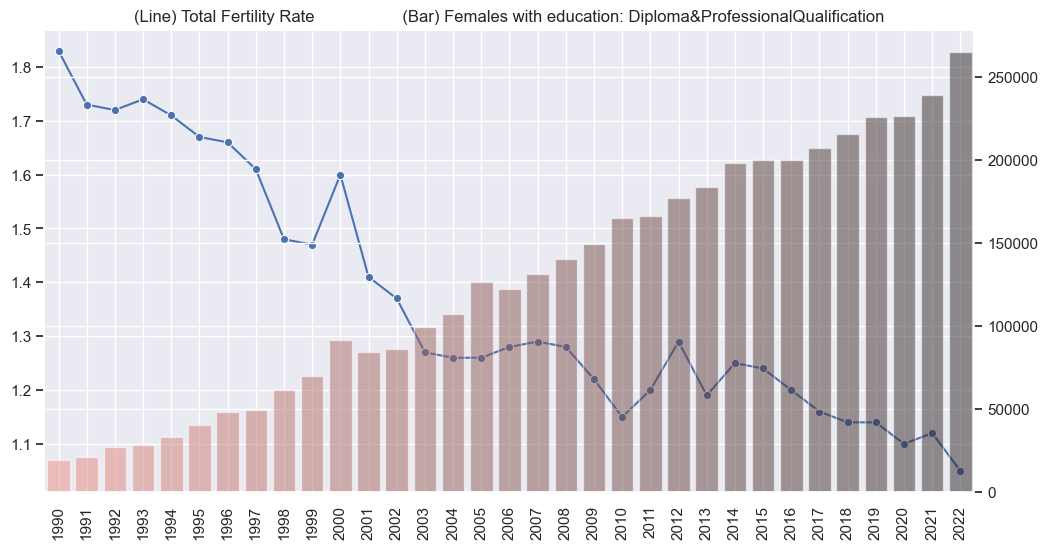

In [51]:
drawGraph("Diploma&ProfessionalQualification")

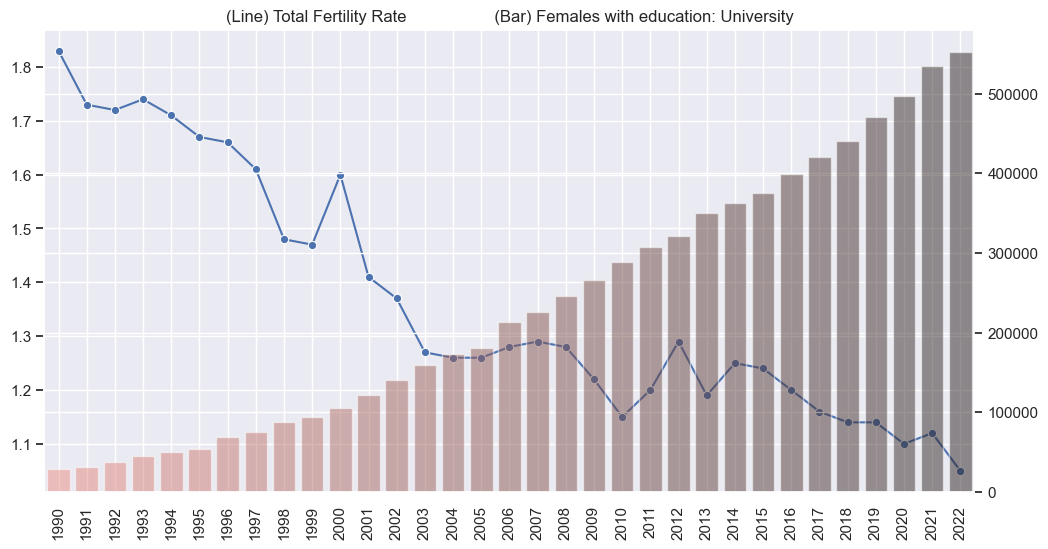

In [52]:
drawGraph("University")

### We can see the ratio of females getting higher education as the year progress. Specially so on the graph on females with university education.

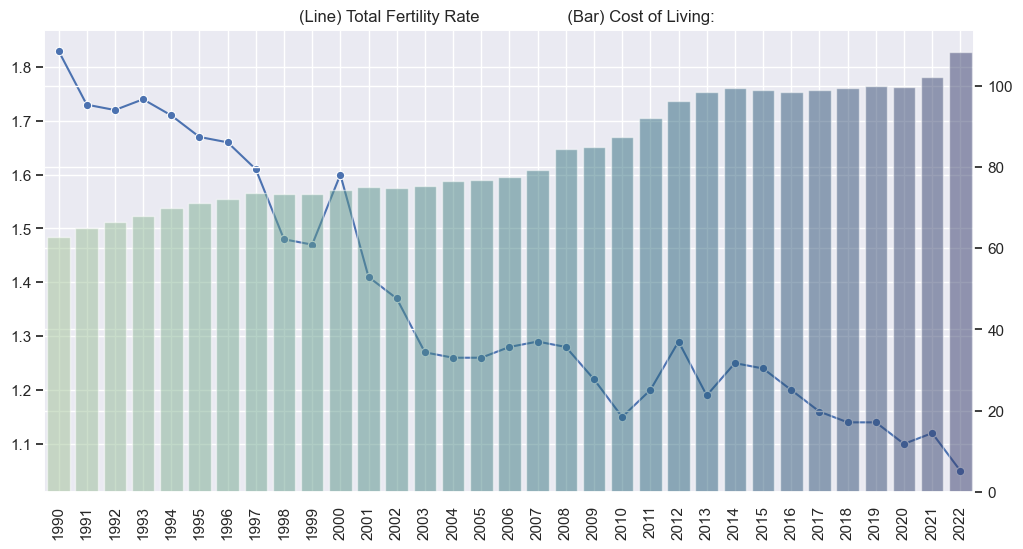

In [53]:
CoLFactor_new = CoLFactor
CoLFactor_new = CoLFactor_new.reset_index()
CoLFactor_new = CoLFactor_new[CoLFactor_new['Years'] >= 1990]
CoLFactor_new = CoLFactor_new.iloc[::-1].reset_index(drop=True)
CoLFactor_new

fig, ax1 = plt.subplots(figsize=(12,6))

sb.lineplot(data = CoLFactor_new['TotalFertilityRate'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()
sb.barplot(data=CoLFactor_new, x='Years', y='AllItems', palette="crest", alpha=0.5, ax=ax2)


ax1.set_ylabel("")
ax2.set_ylabel("")
ax1.set_xticklabels(CoLFactor_new['Years'], rotation=90)
plt.title("(Line) Total Fertility Rate                   (Bar) Cost of Living: ")
print("")

### The cost of living trend in reverse from the fertility rate. Lets explore the breakdown of each individual catergories in Cost of Living with a Correlation Map

<AxesSubplot:>

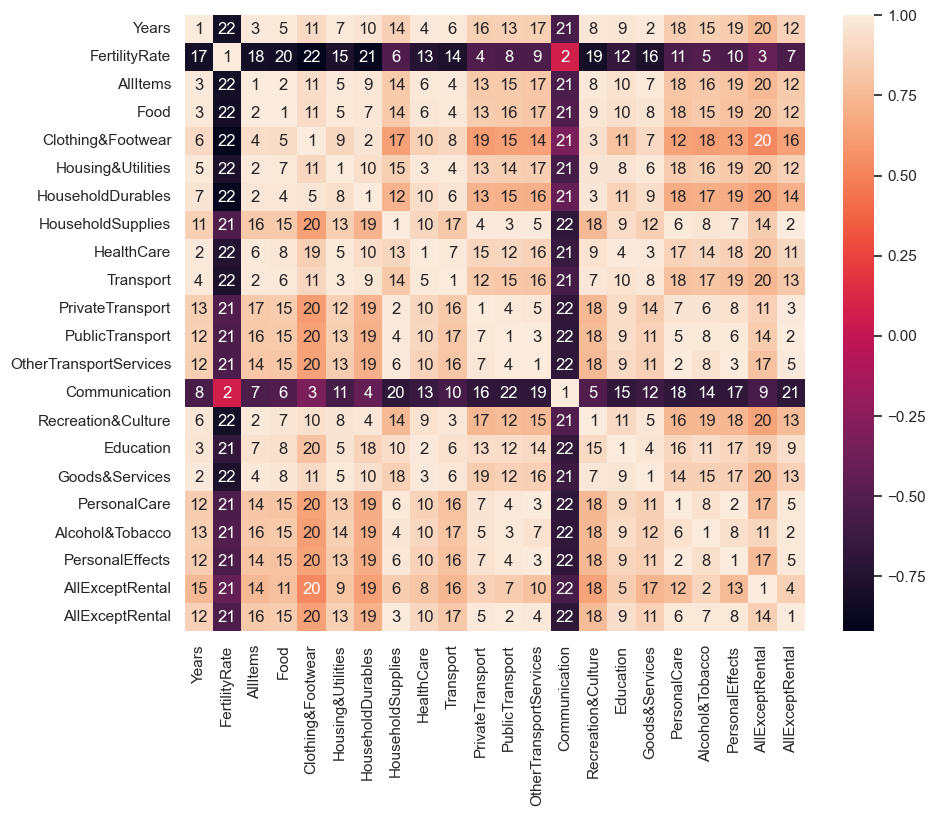

In [55]:
CoLFactor_new2 = CoLFactor.reset_index()
CoLFactor_new2.rename(columns={'TotalFertilityRate': 'FertilityRate'}, inplace=True)
CoLFactor_new2.rename(columns={'HouseholdDurables&Services': 'HouseholdDurables'}, inplace=True)
CoLFactor_new2.rename(columns={'HouseholdServices&Supplies': 'HouseholdSupplies'}, inplace=True)
CoLFactor_new2.rename(columns={'MiscellaneousGoods&Services': 'Goods&Services'}, inplace=True)
CoLFactor_new2.rename(columns={'AlcoholicDrinks&Tobacco': 'Alcohol&Tobacco'}, inplace=True)
CoLFactor_new2.rename(columns={'AllItemsLessAccommodation': 'AllExceptRental'}, inplace=True)
CoLFactor_new2.rename(columns={'AllItemsLessImputedRentalsOnOwnertoOccupiedAccommodation': 'AllExceptRental'}, inplace=True)

CoLFactor_new2 = CoLFactor_new2.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ranked_data = CoLFactor_new2.rank(axis='columns')
reversed_ranked_data = ranked_data.apply(lambda x: np.max(x) - x + 1)
sb.heatmap(CoLFactor_new2, annot=reversed_ranked_data, ax=ax)


### The graph show the ranking (1 = closest to the trend, 22 = move in reverse with the trend) <br> All items increase in cost, as the year progress and as the fertility rate decrease (with exception of communication cost) We can see the correlation coefficient on the heatmap below.

### Correlation matrix

<AxesSubplot:>

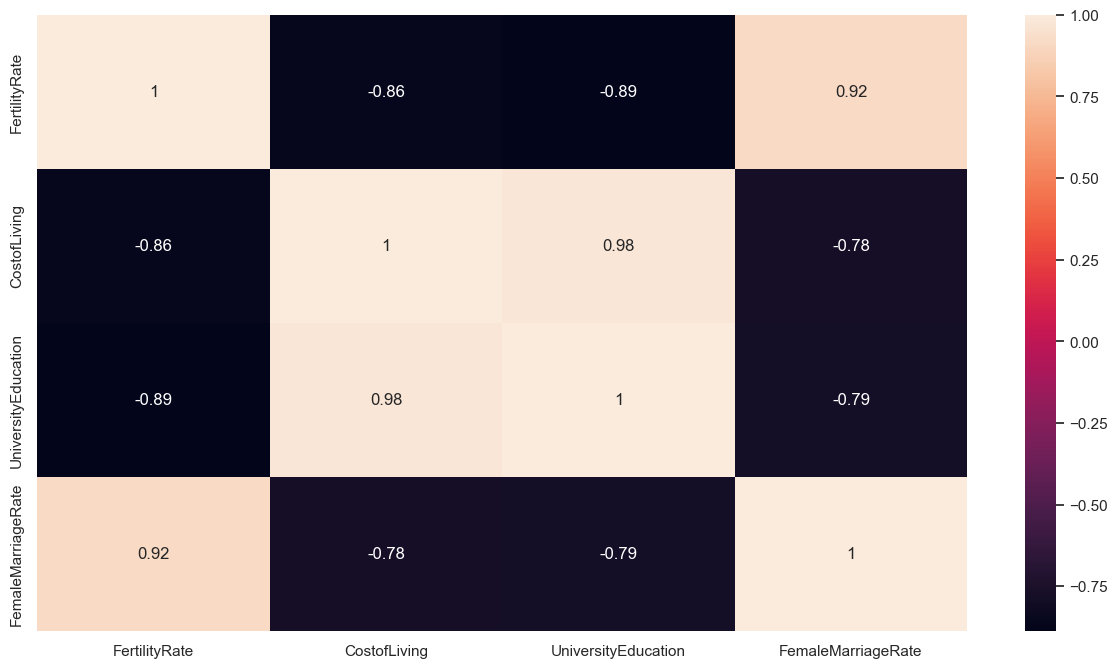

In [74]:
cm1 = CoLFactor.iloc[:33,:2]
cm2  = EduFactor.iloc[:,5:6]
cm3 = MarFactor.iloc[:33,1:2]
cm4 = pd.merge(cm1, cm2, on='Years')
corrMatrix = pd.merge(cm4, cm3, on='Years')
corrMatrix.rename(columns={'TotalFertilityRate': 'FertilityRate'}, inplace=True)
corrMatrix.rename(columns={'AllItems': 'CostofLiving'}, inplace=True)
corrMatrix.rename(columns={'University': 'UniversityEducation'}, inplace=True)
corrMatrix.rename(columns={'FemaleGeneralMarriageRate': 'FemaleMarriageRate'}, inplace=True)
corrMatrix2 = corrMatrix.corr()

fig, ax = plt.subplots(figsize=(15, 8))
sb.heatmap(corrMatrix2, annot=True)

### We are see all 3 variable are quite closely related: As the fertility rate decrease, female marriage rate decrease (correlation coefficient : 0.92). While the other 2 also trend closely but in the inverse (Cost of living Corr Coeff: -0.86,  University Education Corr Coeff: -0.89)